# Visualizing distributions of data

- 변수가 어떻게 분포되어 있는지 이해하는 것은 데이터를 분석하거나 모델링하는 데 중요한 첫 단계입니다. 
- 분포 시각화 기법은 많은 중요한 질문에 빠른 대답을 제공할 수 있습니다. 
- 관측치들이 어떤 범위를 커버하는지, 중심 경향성이 어떤지, 한쪽 방향으로 심하게 치우쳤는지, 이중모드가 있는지의 여부, 유의한 이상치가 있는지 등을 알 수 있습니다. 
- 이러한 질문에 대한 답이 다른 변수로 정의된 하위 집합에서 달라지는지 여부도 파악할 수 있습니다.

- 분포 모듈에는 이러한 질문에 대답하기 위해 설계된 여러 함수들이 포함되어 있습니다. 
- axes 레벨 함수는 histplot(), kdeplot(), ecdfplot(), rugplot()입니다. 
- 이러한 함수들은 figure 레벨 displot(), jointplot(), pairplot() 함수 내에서 그룹화됩니다.
- 분포를 시각화하는 몇 가지 다른 접근 방식이 있으며, 각각의 상대적인 장단점이 있습니다. 
- 특정 목적에 가장 적합한 접근 방식을 선택할 수 있도록 이러한 요소를 이해하는 것이 중요합니다.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import plotly.express as px
import seaborn.objects as so
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
tips = sns.load_dataset("tips")
dots = sns.load_dataset("dots")
fmri = sns.load_dataset("fmri")
flights = sns.load_dataset("flights")
dowjones = sns.load_dataset("dowjones")
anagrams = sns.load_dataset("anagrams")
penguins = sns.load_dataset("penguins")
diamonds = sns.load_dataset("diamonds")
healthexp = sns.load_dataset("healthexp")
healthexp = sns.load_dataset("healthexp").sort_values("Year")
flights_wide = flights.pivot(index="year", columns="month", values="passengers")

# Plotting univariate histograms

- 분포를 시각화하는 가장 일반적인 방법 중 하나는 히스토그램입니다. 
- 이것은 displot()에서 기본적인 방법으로 사용되며, histplot()과 동일한 기본 코드를 사용합니다. 
- 히스토그램은 데이터 변수를 나타내는 축을 일련의 이산적인 구간으로 분할하고 각 구간에 속하는 관측치의 수를 해당 막대의 높이로 나타내는 막대 그래프입니다.

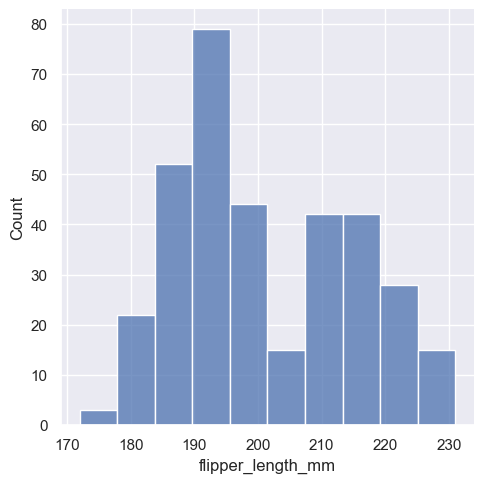

In [4]:
sns.displot(penguins, x="flipper_length_mm");

- 이 그래프를 통해 flipper_length_mm 변수에 대해 몇 가지 인사이트를 얻을 수 있습니다. 
- 예를 들어, 가장 일반적인 flipper_length는 약 195mm인 것으로 보이지만 분포는 이분 모양으로 나타나므로 이 하나의 숫자로 데이터를 잘 나타낼 수 없습니다.

## Choosing the bin size

- 구간의 크기는 중요한 매개변수이며 잘못된 구간 크기는 데이터의 중요한 특성을 가리거나 임의의 변동성에서 특성을 만들어낼 수 있기 때문에 오해를 불러일으킬 수 있습니다.
- displot() / histplot()은 기본적으로 데이터의 분산 및 관측치 수에 따라 기본 구간 크기를 선택하지만 
- 데이터 구조에 대한 특정 가정에 의존하므로 이러한 자동 접근법에 과도하게 의존해서는 안됩니다. 
- 분포가 서로 다른 구간 크기에서도 일관된지 확인하는 것이 항상 좋습니다. 직접 크기를 선택하려면 binwidth 매개변수를 설정하세요.

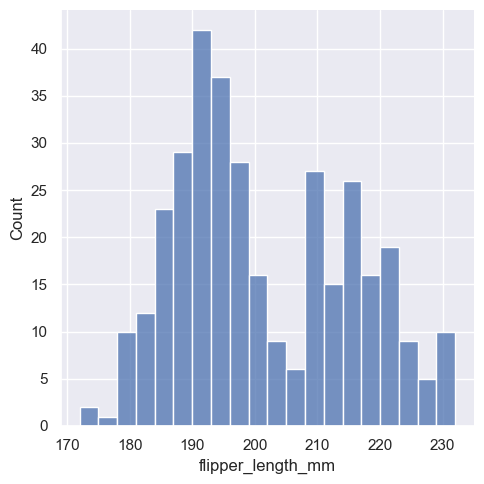

In [5]:
sns.displot(penguins, x="flipper_length_mm", binwidth=3);

- 다른 상황에서는 크기보다는 bins의 개수를 지정하는 것이 더 합리적일 수 있습니다:

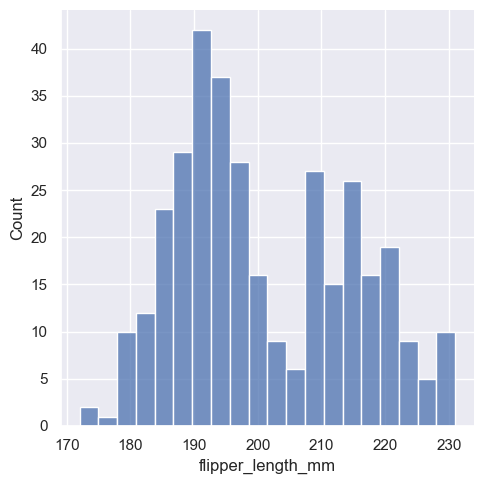

In [6]:
sns.displot(penguins, x="flipper_length_mm", bins=20);

- 기본값이 실패하는 상황의 한 가지 예는 변수가 상대적으로 적은 수의 정수 값을 사용하는 경우입니다. 
- 이 경우 기본 구간차원 너비가 너무 작아 분포에 어색한 간격이 생길 수 있습니다:

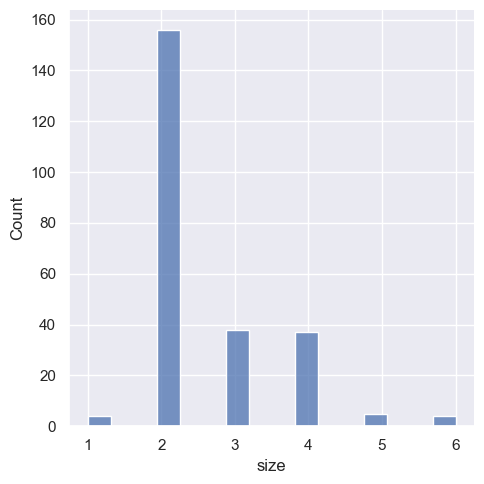

In [7]:
sns.displot(tips, x="size");

- 한 가지 방법은 bins에 배열을 전달하여 정확한 bins 나누기를 지정하는 것입니다: 😮

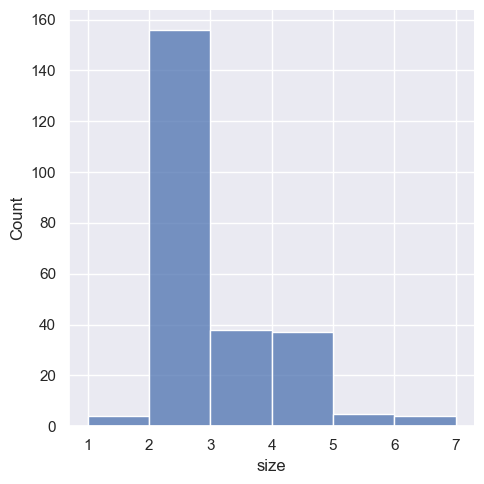

In [8]:
sns.displot(tips, x="size", bins=[1, 2, 3, 4, 5, 6, 7]);

- discrete=True를 설정하여 데이터 집합의 고유 값을 나타내는 구간차원 나누기를 해당 값을 중심으로 막대가 있는 막대로 선택할 수도 있습니다.

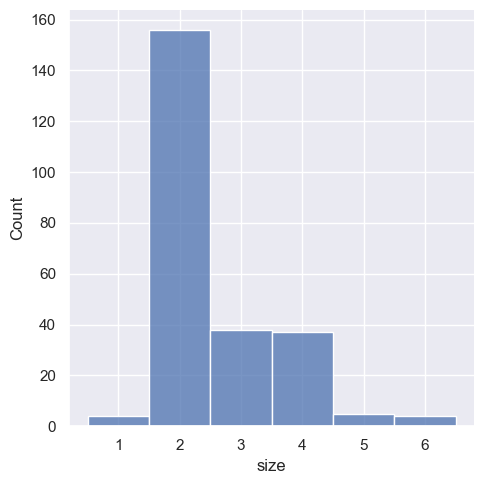

In [9]:
sns.displot(tips, x="size", discrete=True);

- 범주형 변수의 분포를 히스토그램의 로직을 이용하여 시각화하는 것도 가능합니다. 
- 범주형 변수의 경우 이산적인 구간이 자동으로 설정됩니다. 
- 그러나 축의 범주적 성격을 강조하기 위해 막대를 약간 "축소"하는 것도 도움이 될 수 있습니다.

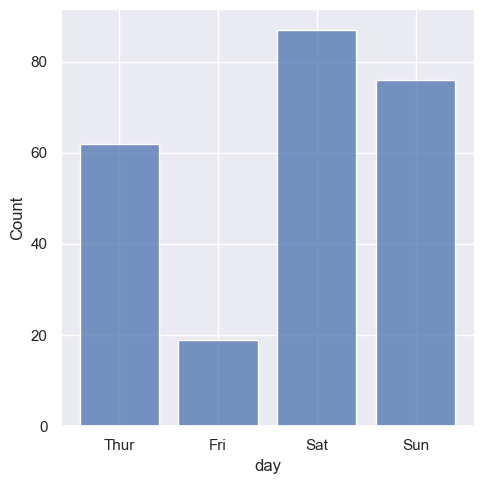

In [10]:
# 축소 후
sns.displot(tips, x="day", shrink=.8);

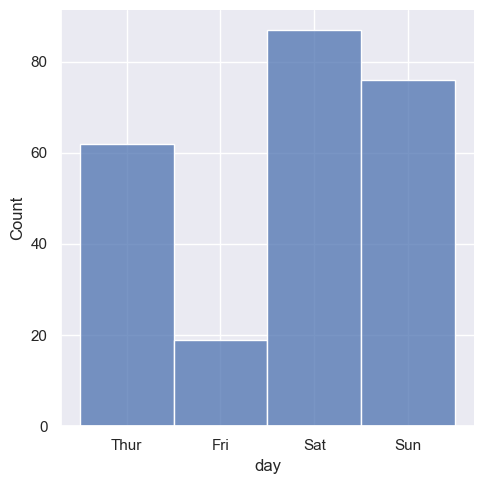

In [11]:
# 축소 전
sns.displot(tips, x="day");

## Conditioning on other variables

- 변수의 분포를 이해한 후에는 종종 데이터 집합 내 다른 변수와 이 분포의 특징이 다른지 여부를 알아보는 것이 다음 단계입니다. 
- 예를 들어, 위에서 보았던 flipper lengths의 이분 모양 분포는 무엇에 기인하는 것일까요? 
- displot() 및 histplot()은 hue semantic을 통해 조건부 하위 집합 지원을 제공합니다. 
- hue에 변수를 할당하면 해당 변수의 고유한 값마다 별도의 히스토그램을 그리고 색상으로 구별합니다.

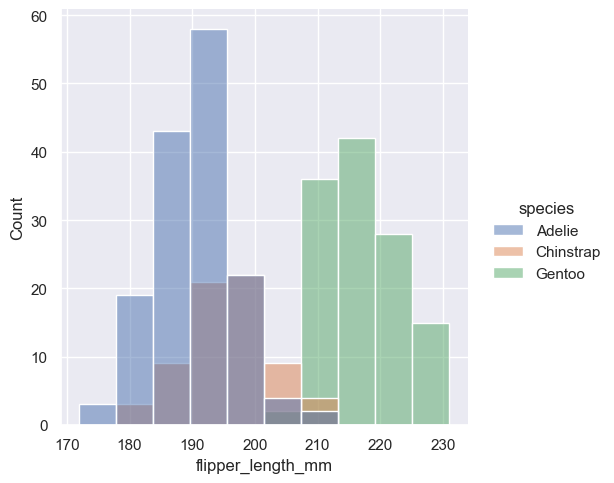

In [12]:
sns.displot(penguins, x="flipper_length_mm", hue="species");

- 기본적으로, 각각의 다른 히스토그램은 서로 "레이어"되어 그려지며, 경우에 따라 구별하기 어려울 수 있습니다. 
- 하나의 옵션은 히스토그램의 시각적 표현을 막대 그래프에서 "스텝" 그래프로 변경하는 것입니다.

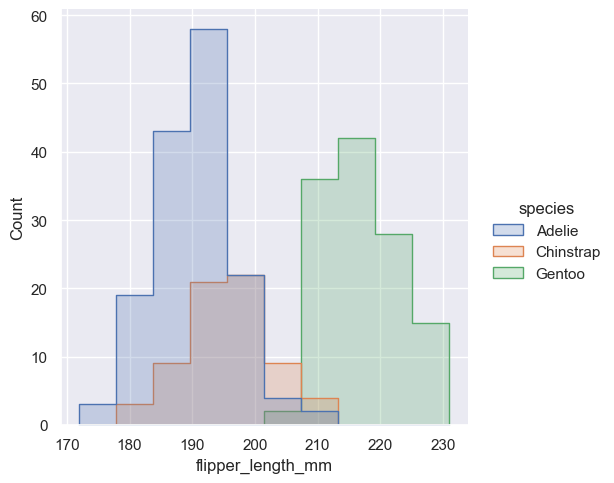

In [13]:
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step");

- 또는 각 막대를 누적되도록 세로로 이동시켜 "스택"할 수도 있습니다. 
- 이 그래프에서 전체 히스토그램의 윤곽은 단일 변수만 사용한 그림과 일치합니다.

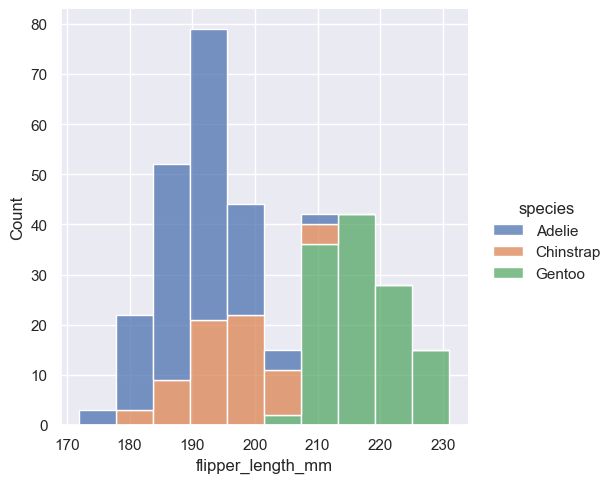

In [14]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack");

- 스택 히스토그램은 변수 간의 부분-전체 관계를 강조하지만, 다른 특징들을 가리기도 합니다. (예를 들어, Adelie 분포의 모드를 결정하기 어렵습니다). 
- 다른 선택지로는 막대를 수평으로 이동하고 너비를 줄여 겹치지 않게 하는 "도지(dodge)"하는 것입니다. 
- 이렇게하면 겹침이 없으며 막대의 높이에 따라 비교 가능합니다. 그러나 범주형 변수가 적은 수준을 갖는 경우에만 잘 작동합니다.

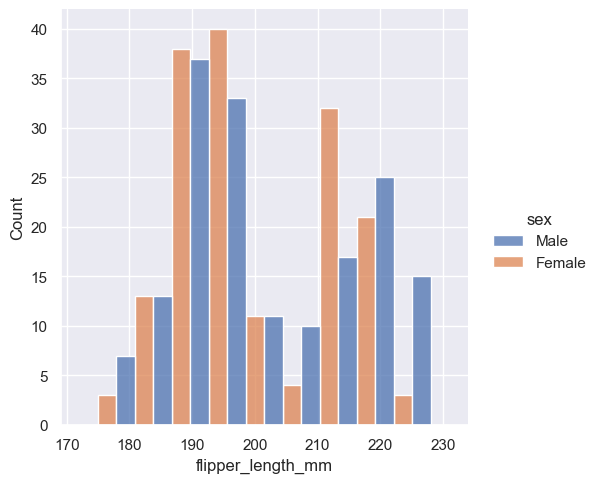

In [15]:
sns.displot(penguins, x="flipper_length_mm", hue="sex", multiple="dodge");

- displot() 함수는 FacetGrid에 그려지는 figure-level 함수이기 때문에, 
- hue 대신 col 또는 row에 두 번째 변수를 할당하여 각각의 개별적인 분포를 별도의 서브플롯에 그릴 수도 있습니다. 
- 이는 각 하위 집합의 분포를 잘 나타내지만, 직접적인 비교는 더 어렵게 만듭니다.

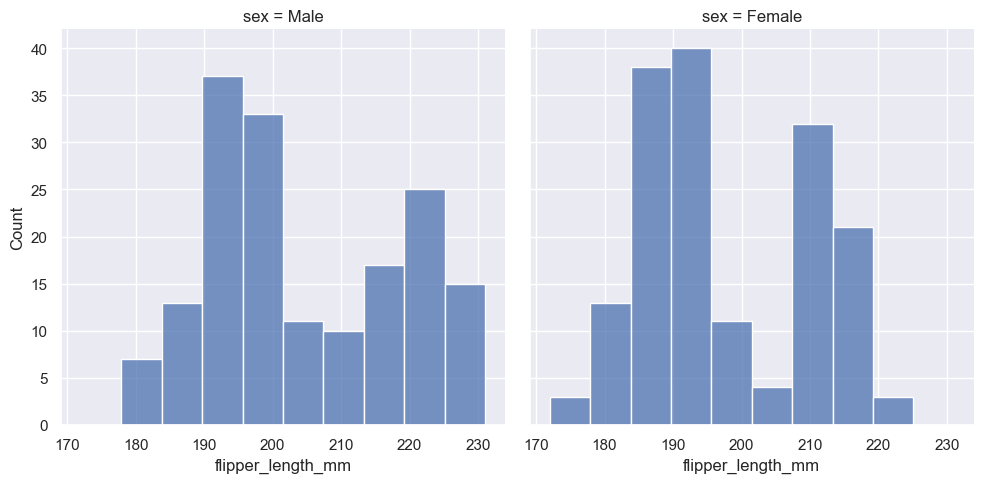

In [16]:
sns.displot(penguins, x="flipper_length_mm", col="sex");

- 이러한 접근 방식 중 어느 것도 완벽하지는 않으며, 곧 비교 작업에 더 적합한 히스토그램에 대한 몇 가지 대안을 보게 될 것입니다.

## Normalized histogram statistics

- 하지만 하위 집합의 관측치 수가 다르면, 카운트를 기반으로 분포를 비교하는 것은 이상적이지 않을 수 있습니다.
- 이를 해결하는 방법 중 하나는 stat 매개변수를 사용하여 정규화된 카운트를 계산하는 것입니다.

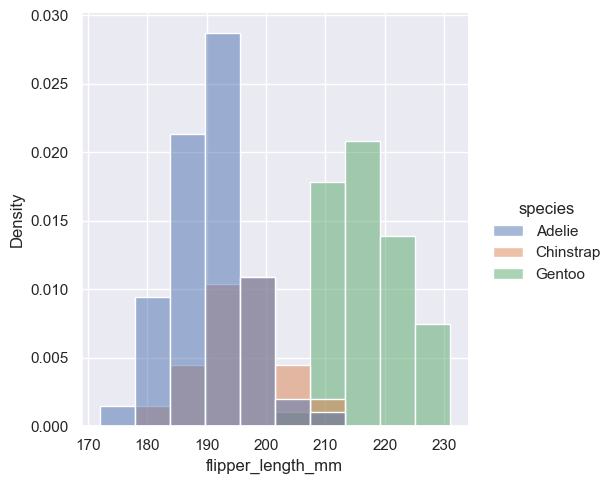

In [17]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density");

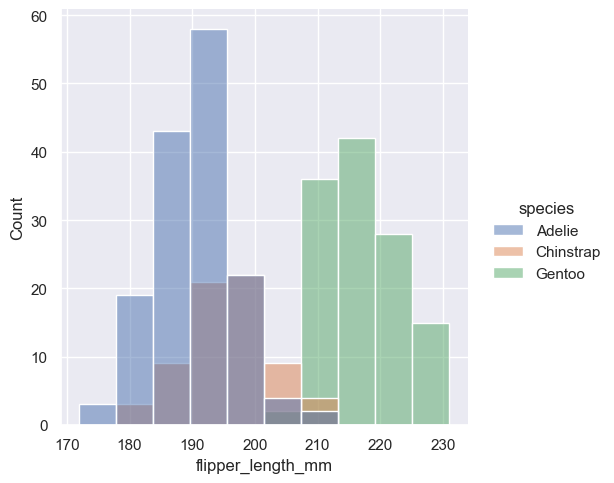

In [18]:
sns.displot(penguins, x="flipper_length_mm", hue="species");

- 그러나 기본적으로 정규화는 전체 분포에 적용되므로, 이는 막대의 높이를 재조정하는 것입니다. 
- common_norm=False를 설정하여 각 하위 집합을 독립적으로 정규화하면, 분포를 직접 비교할 수 있습니다.

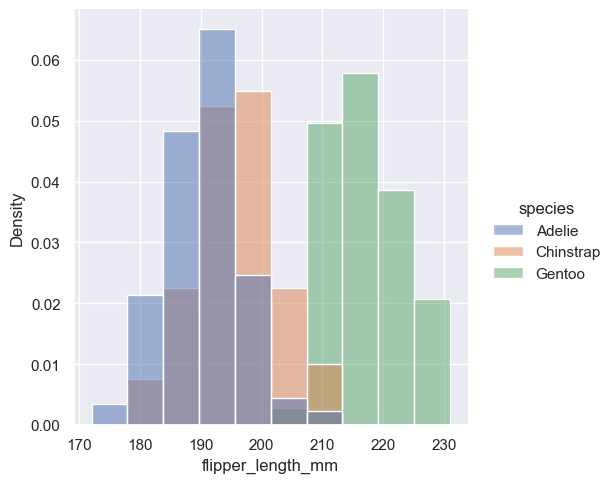

In [19]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density", common_norm=False);

- Density normalization은 막대의 면적의 합이 1이 되도록 스케일을 조정합니다. 
- 따라서 density 축은 직접적으로 해석할 수 없습니다. 
- 또 다른 옵션은 막대의 높이가 1이 되도록 정규화하는 것입니다. 
- 이는 변수가 이산형일 때 가장 적합하지만, 모든 히스토그램에 대한 옵션입니다.

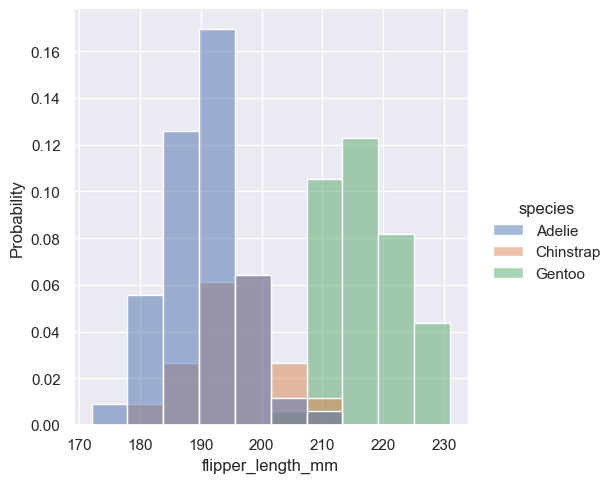

In [20]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="probability");

# Kernel density estimation

- 히스토그램은 이산적인 구간을 사용하여 데이터를 분류하고 세는 방식으로, 데이터를 생성한 확률 밀도 함수를 근사하려는 목적을 가지고 있습니다. 
- 이와 유사한 목적을 가지지만 다른 방법으로, 커널 밀도 추정(KDE)은 관측치를 가우시안 커널로 부드럽게 처리하여 연속적인 밀도 추정을 생성합니다.

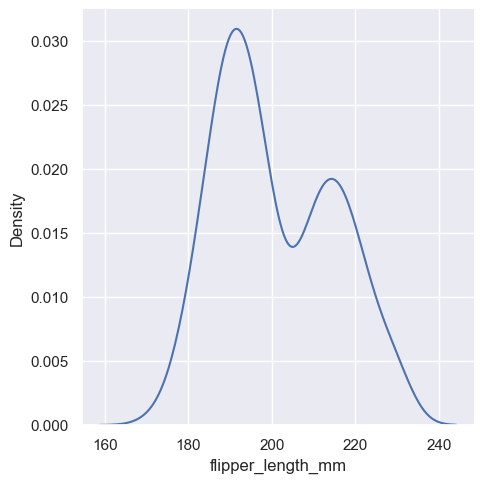

In [2]:
sns.displot(penguins, x="flipper_length_mm", kind="kde");

## Choosing the smoothing bandwidth

- 히스토그램에서와 마찬가지로, KDE의 성능은 부드러운 정도를 조절하는 스무딩 대역폭 선택에 따라 달라집니다. 
- 과도하게 스무딩하면 의미 있는 특징이 사라질 수 있으며, 반면에 적게 스무딩하면 무작위 잡음 내에 진짜 모양이 가려질 수 있습니다. 
- 추정값의 강건성을 확인하는 가장 쉬운 방법은 기본 대역폭을 조정하는 것입니다.

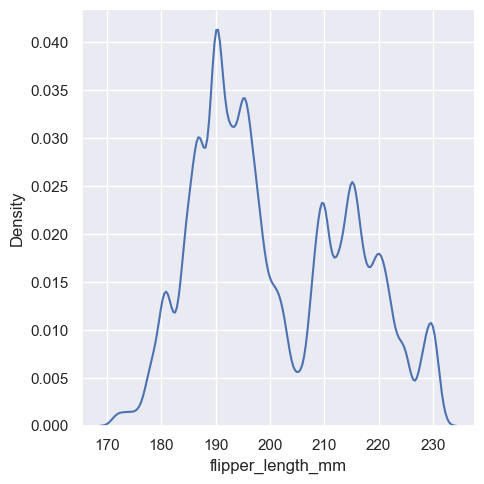

In [3]:
# bw_adjust=.25
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=.25);

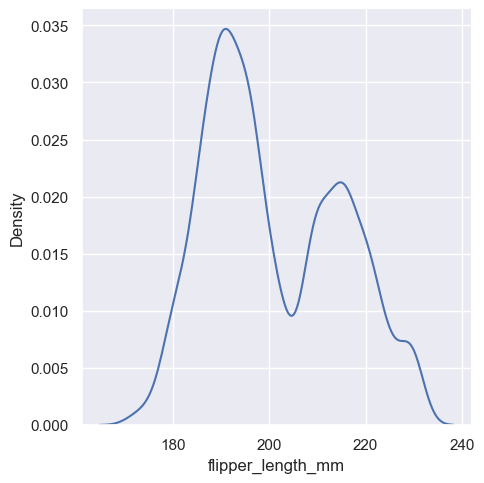

In [6]:
# bw_adjust=.55
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=.55);

- 좁은 대역폭은 양극성(bimodality)을 더욱 더 잘 드러내지만, 곡선은 훨씬 부드럽지 않습니다. 
- 대조적으로, 큰 대역폭은 양극성을 거의 완전히 가리게 합니다.

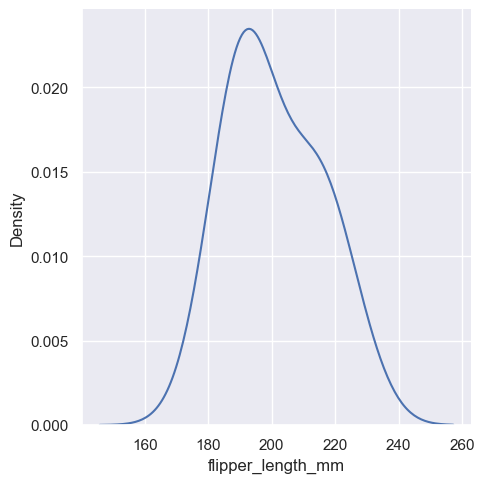

In [4]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=2);

## Conditioning on other variables

- 히스토그램과 마찬가지로, 색조 변수를 할당하면 해당 변수의 각 수준마다 별도의 밀도 추정값이 계산됩니다.

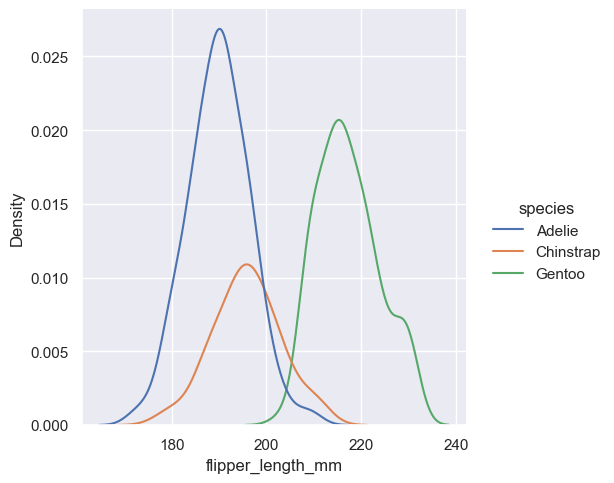

In [5]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde");

- 많은 경우, KDE는 계층적 히스토그램보다 해석하기 쉽기 때문에 비교 작업에 좋은 선택입니다. 
- 그러나 다중 분포를 해결하는 데 필요한 많은 옵션은 KDE에도 적용됩니다.

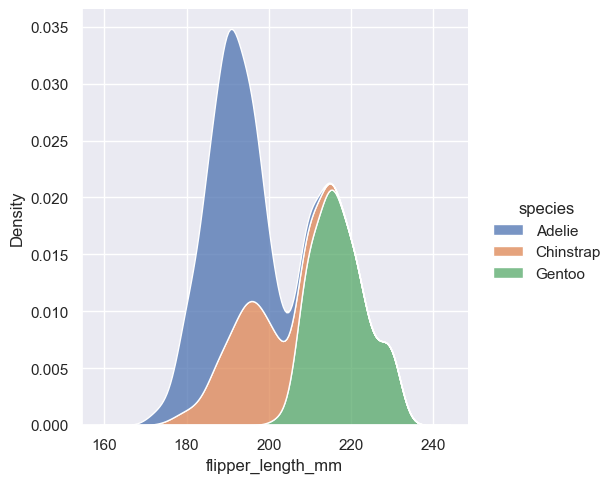

In [7]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", multiple="stack");

- 기본적으로 적층(stack) 그래프는 각 곡선 사이의 영역을 채우지만, 단일 또는 계층 밀도를 채우는 것도 가능합니다. 
- 그러나 개별 밀도를 분리하여 해결하기 쉽도록 기본 alpha 값(투명도)이 다르기 때문에 각 개별 밀도를 더욱 더 잘 해결할 수 있습니다.

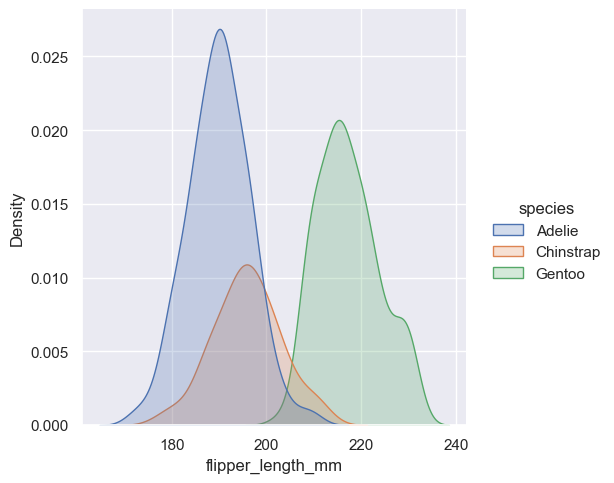

In [8]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True);

## Kernel density estimation pitfalls

- KDE 그래프는 많은 장점이 있습니다. 
- 데이터의 중심 경향성, 이분법성, 비대칭성과 같은 중요한 특성이 쉽게 식별되며, 하위 집합 간의 비교가 용이합니다. 
- 그러나 KDE가 기본 분포가 매끄럽고 무한한 것으로 가정하기 때문에 기본 데이터가 잘 표현되지 않는 상황도 있습니다. 
- 이는 변수가 자연적으로 한정된 양을 반영하는 경우에 발생할 수 있습니다. 
- 예를 들어, 음수가 될 수 없는 변수의 작은 값들과 같은 경계에 가까이 위치한 관측치들이 있는 경우, KDE 곡선은 현실적으로 불가능한 값까지 연장될 수 있습니다.

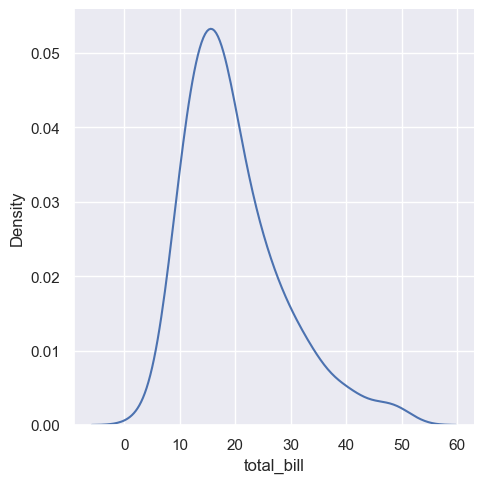

In [9]:
sns.displot(tips, x="total_bill", kind="kde");

- 이는 곡선이 그려지는 범위를 지정하는 cut 매개변수로 일부 해결할 수 있지만, 
- 이는 곡선이 그려지는 위치만 변경할 뿐, 데이터가 존재하지 않을 수 있는 범위에서 밀도 추정치가 부드러워져서 분포의 극단에서 인위적으로 낮아질 가능성이 여전히 있습니다.

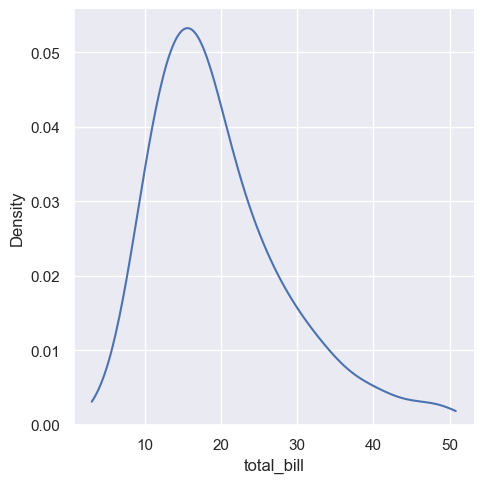

In [10]:
sns.displot(tips, x="total_bill", kind="kde", cut=0);

- 또한, KDE 방법은 이산 데이터나 특정 값이 과도하게 나타나는 경우와 같이 자연적으로 연속적인 데이터가 아닌 경우에도 실패합니다. 
- 중요한 것은 KDE가 데이터 자체가 부드럽지 않아도 항상 매끄러운 곡선을 보여준다는 것입니다. 
- 예를 들어, 다이아몬드 무게 분포를 살펴보면 KDE는 특정 값 주변에 피크가 있다는 것을 시사하지만, 히스토그램은 훨씬 울퉁불퉁한 분포를 보여줍니다.

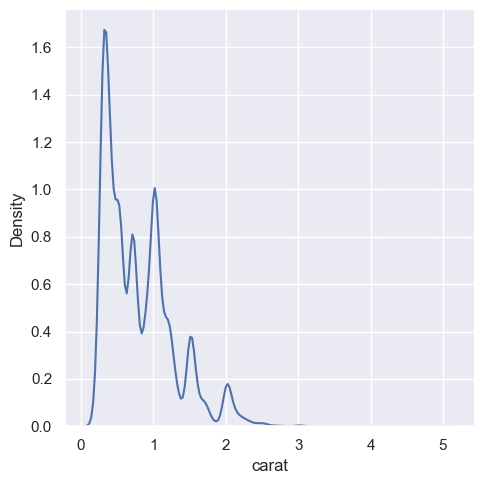

In [11]:
sns.displot(diamonds, x="carat", kind="kde");

- KDE는 특정 값 주변에 피크가 있음을 시사하지만, 히스토그램은 훨씬 더 들쭉날쭉한 분포를 보여줍니다:

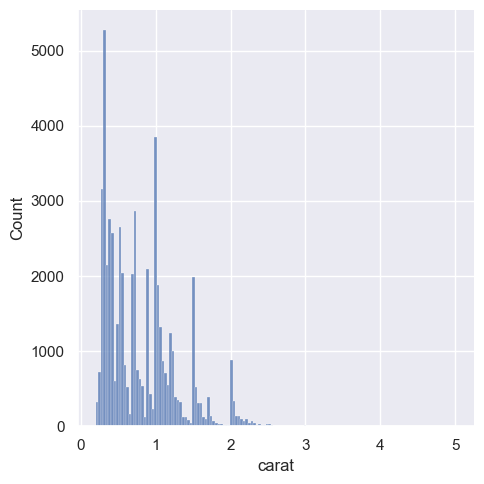

In [12]:
sns.displot(diamonds, x="carat");

- 그러나 양자간의 절충점으로 이 두 가지 방법을 결합할 수 있습니다. 
- 히스토그램 모드에서 displot() (histplot()과 마찬가지로)은 부드러운 KDE 곡선을 포함하는 옵션(kde=True, kind="kde"가 아니라)을 가지고 있습니다.

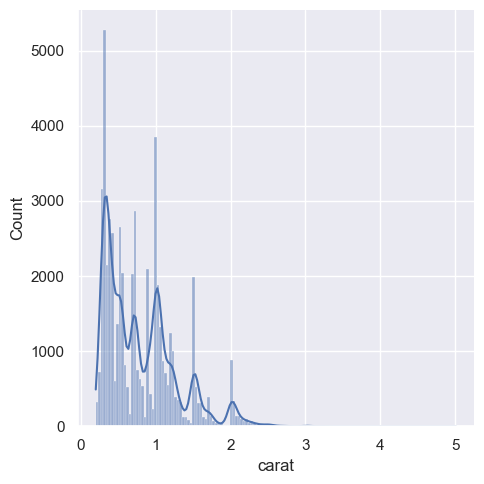

In [13]:
sns.displot(diamonds, x="carat", kde=True);